<a href="https://colab.research.google.com/github/Jasmeet-011/Fashion-MNIST/blob/main/fasion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion MNIST is a dataset from online fashion retailer Zalando consisting of a training set of 60,000 examples and a test set of 10,000 examples, where each example is a 28x28 grayscale image belonging to one of 10 possible classes (such as a t-shirt, dress, etc). It can be used as a drop-in replacement for the original MNIST digit dataset.

In this tutorial, we'll train a type of fully connected neural network called a multilayer perceptron to predict the clothing category for each image. Because the image can belong to one of ten categories, this prediction problem is a multi-class classification problem. We will access the neural network library Keras through a Tensorflow backend.

The class labels are as follows:

Label	Description

0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


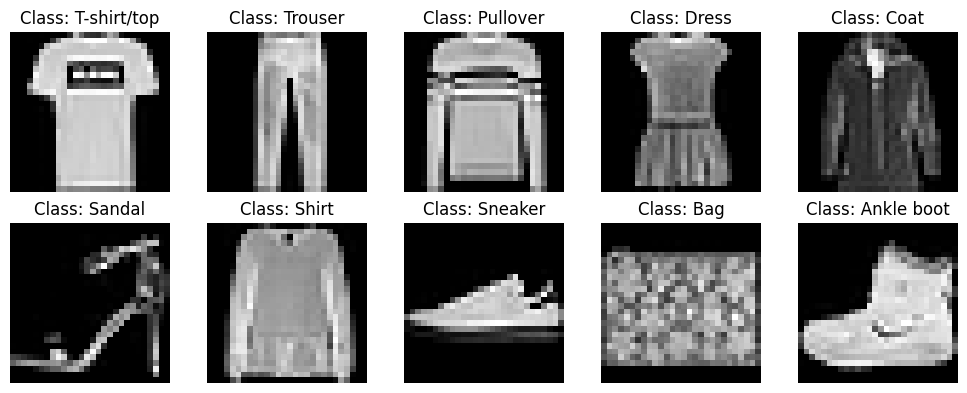

In [ ]:
class_labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

fig = plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_train[y_train == i][0]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Class: {}".format(class_labels_dict[i]))
    plt.axis('off')
    
plt.tight_layout()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
X_train /= 255.0
X_test /= 255.0

In [ ]:
num_classes = 10 # There are 10 classes possible 
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential() # Declare a Sequential model 

model.add(Dense(512, input_shape=(784,))) # Add a dense input layer of 512 units
                                 # The input shape is (784,) because the features are 784 dimensional vectors
model.add(Activation('relu')) # Apply ReLu activation function to the layer output
model.add(Dropout(0.2)) # Dropout helps prevent the model from overfitting on the training data
model.add(Dense(512)) # Add a hidden layer of 512 units
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes)) # Add an output layer of 10 units, the number of classes 
model.add(Activation('softmax')) # The "softmax" activation ensures the output is a valid probability distribution

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
filepath="mlp-weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(X_train, 
                    Y_train,
                    batch_size=128, 
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/25
469/469 [==============================] - 8s 5ms/step - loss: 0.5177 - accuracy: 0.8137 - val_loss: 0.4189 - val_accuracy: 0.8485
Epoch 2/25
469/469 [==============================] - 2s 5ms/step - loss: 0.3786 - accuracy: 0.8612 - val_loss: 0.3750 - val_accuracy: 0.8608
Epoch 3/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3496 - accuracy: 0.8713 - val_loss: 0.3583 - val_accuracy: 0.8716
Epoch 4/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3260 - accuracy: 0.8793 - val_loss: 0.3634 - val_accuracy: 0.8712
Epoch 5/25
469/469 [==============================] - 3s 5ms/step - loss: 0.3097 - accuracy: 0.8850 - val_loss: 0.3573 - val_accuracy: 0.8699
Epoch 6/25
469/469 [==============================] - 2s 4ms/step - loss: 0.2976 - accuracy: 0.8895 - val_loss: 0.3545 - val_accuracy: 0.8726
Epoch 7/25
469/469 [==============================] - 2s 4ms/step - loss: 0.2865 - accuracy: 0.8924 - val_loss: 0.3329 - val_accuracy: 0.8804
Epoch 

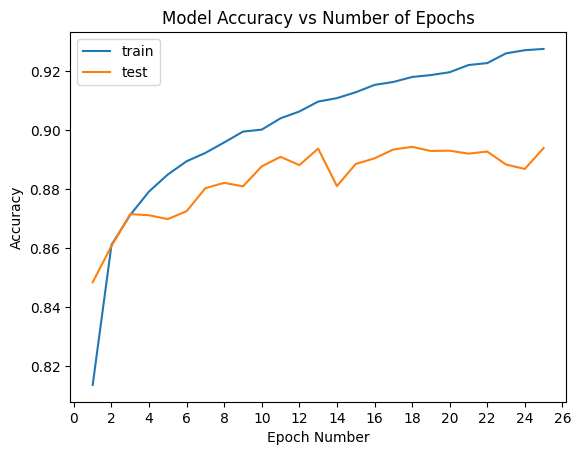

In [ ]:
plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(1,1+len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,28,2))
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]

313/313 [==============================] - 1s 2ms/step


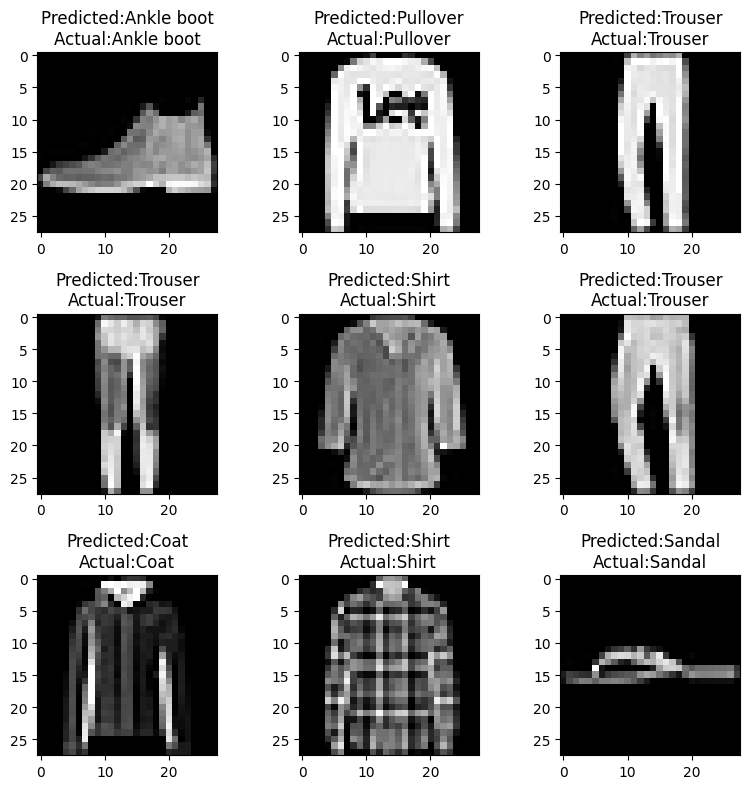

In [ ]:
plt.figure(figsize=(8,8))

for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted:{}\nActual:{}".format(class_labels_dict[y_pred[correct]],class_labels_dict[y_test[correct]]))

plt.tight_layout() 